# Project

Name: Stacy Waweru 

Class: Fulltime Hybrid

Technical Mentor: Diana Mongina 

## Business Overview

As a member of the data science team, I have been tasked to analyse the air quality dataset and provide insights to the business. The data was collected from a multigas sensor array that was deployed in the field in an Italian city.
The data was collected between March 2004 and February 2005 (one year) representing the time in which the sensor was operated. The data was collected at an industrial location with high levels of pollution. 

Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities.

        

## Purpose of Research
To develop a predictive model that uses the sensor readings and meteorological data to help city planners and health officials monitor and manage air quality more effectively.

Primary Objective:  
Analyze the relationship between environmental and meteorological factors to identify key influences on air quality and pollutant levels.

Objectives: 

1. Determine the pollutants that are most strongly correlated with specific meteorological conditions.
2. To analyze trends in pollutant levels to understand seasonal or time-based variations in pollution concentrations.  
3. To build and evaluate machine learning models that will investigate how changes in meteorological factors impact the concentrations of key pollutants over time.


## The Data

The data is in the form of an excel file. Data was collected over a period of a year.

### Data Exploration

In [1]:
# import necessary libraries

import pandas as pd
import os
import math
from numbers import Number
import numpy as np
from scipy.stats import norm, skew, zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, RFE, RFECV)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


%matplotlib inline

In [2]:
# Read the data

data_path = r"AirQualityUCI.xlsx"

data_df = pd.read_excel(data_path)


In [3]:
# Display the first 5 rows of the data
data_df.head() 

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [4]:
# Display the last 5 rows of the data
data_df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [5]:
# Determine the shape of the data
data_df.shape

(9357, 15)

In [6]:
# Display the columns of the data
data_df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

The dataset contains hourly data for 9358 hours and 15 features.   

1. Date of observation

2. Time of observation

3. CO (GT) - True hourly averaged concentration CO in mg/m^3 (reference analyzer)

4. PT08.S1 (CO) - (tin oxide) hourly averaged sensor response (nominally CO targeted)

5. NMHC (GT) - True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

6. C6H6 (GT) - True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

7. PT08.S2 (NMHC) - (titania) hourly averaged sensor response (nominally NMHC targeted)

8. NOx (GT) - True hourly averaged NOx concentration in ppb (reference analyzer)

9. PT08.S3 (NOx) - (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

10. NO2 (GT) - True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

11. PT08.S4 (NO2) - (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

12. PT08.S5 (O3) - (indium oxide) hourly averaged sensor response (nominally O3 targeted)

13. T - Temperature in °C

14. RH - Relative Humidity (%)

15. AH - Absolute Humidity

### Data Cleaning

In [7]:
# Information about the data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

The data does not appear to have missing values. However, missing values are tagged with -200 values.  The missing values represented by -200 will be replaced with NaN to make them easier to identify.

In [8]:
# Replace missing values (-200) with NaN

data_df.replace(-200, np.nan, inplace=True)
data_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [9]:
# Determine the missing values in the data

data_df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64






We will need to find a way to handle the missing values. Some rows will need to be dropped while others may need to be retained.

In [10]:
# Drop the columns with more than 50% missing values    

data_df.dropna(thresh=0.5*len(data_df), axis=1, inplace=True)

data_df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

The NMHC(GT) column has been dropped since more than 50% of it's data was missing. 

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        7718 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1023.6+ KB


If the datatype of the values in the column is either a float or integer, we will use the median value to fill in the missing value.

In [12]:

# Fill the missing values in the data with the mean of the respective columns
columns_with_missing_values = data_df.columns[data_df.isnull().any()] 
for column in columns_with_missing_values:
    data_df[column].fillna(data_df[column].median(), inplace=True)

data_df.isnull().sum()

C:\Users\stacy\AppData\Local\Temp\ipykernel_3680\3673123105.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df[column].fillna(data_df[column].median(), inplace=True)


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

From the above, we can see that there are no missing values in the dataframe. We can proceed to analyze the data. 

We will proceed to separate the time and date into the weekday, month and hour. This will be used in the analysis of the different times that air pollution occurs. 

In [13]:
# separate date
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df['Time'] = pd.to_datetime(data_df['Time'], format='%H:%M:%S').dt.time
data_df['Month'] = data_df['Date'].dt.month_name()
data_df['Day'] = data_df['Date'].dt.day_name()
data_df['Hour'] = data_df['Time'].astype(str).str.split(':').str[0].astype(int)


In [14]:
data_df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Day,Hour
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,March,Wednesday,18
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,March,Wednesday,19
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,March,Wednesday,20
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,March,Wednesday,21
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,March,Wednesday,22


We will rearrange the data so that the month, day and hour columns are closer to the beginning. Redundant columns will be dropped.

In [15]:
# Rearrange the columns

data_df = data_df[['Date', 'Time', 'Month', 'Day', 'Hour', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']] 
data_df

,Date,Time,Month,Day,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,March,Wednesday,18,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,March,Wednesday,19,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,March,Wednesday,20,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,March,Wednesday,21,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,March,Wednesday,22,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,April,Monday,10,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,April,Monday,11,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,April,Monday,12,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,April,Monday,13,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [16]:
#drop time column
data_df.drop('Time', axis=1, inplace=True)
data_df.head()

C:\Users\stacy\AppData\Local\Temp\ipykernel_3680\225717878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop('Time', axis=1, inplace=True)


,Date,Month,Day,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,March,Wednesday,18,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,March,Wednesday,19,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,March,Wednesday,20,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,March,Wednesday,21,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,March,Wednesday,22,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


Check for duplicates

In [17]:
# Check for duplicates
duplicate_rows = data_df.duplicated().sum()
duplicate_rows

0

### Data Preparation

The data is tidy and ready to be used for analysis.


For the analysis, let's focus on pollutants and environmental factors.

The most important pollutants for my analysis are:

1. CO (GT) - Carbon Monoxide (CO): Monitoring CO levels is crucial for assessing air quality and potential exposure risks.

2. NOx (GT) - Nitrogen Oxides (NOx):Monitoring NOx is essential for evaluating air quality, especially in urban areas with significant vehicle emissions.

4. PT08.S5(O3) - Ozone (O₃) - Monitoring ozone levels is crucial for understanding air quality and the potential for smog formation.

These pollutants are relevant because they directly impact air quality and human health. Focusing on these will provide a comprehensive view of the air pollution levels and their potential effects on the environment and public health.

The pollutants chosen represent columns in the dataset since they contain the 3 main pollution elements (Carbon, Nitrogen and ozone).

I will drop all the columns except the following columns:  
Date, month, Day, hour, CO(CT), NOx(GT), PT08.S5(O3), T and RH

Some of the columns will be redundant since they are represented in the remaining columns. I will drop them and remain with the ones that I will use in my analysis and prediction modelling.

In [18]:
# Columns to drop

columns_to_drop = ['PT08.S1(CO)' , 'PT08.S2(NMHC)' , 'PT08.S3(NOx)' , 'PT08.S4(NO2)', 'AH', 'C6H6(GT)', 'NO2(GT)']

data_df = data_df.drop(columns=columns_to_drop)

data_df

,Date,Month,Day,Hour,CO(GT),NOx(GT),PT08.S5(O3),T,RH
0,2004-03-10,March,Wednesday,18,2.6,166.0,1267.50,13.600,48.875001
1,2004-03-10,March,Wednesday,19,2.0,103.0,972.25,13.300,47.700000
2,2004-03-10,March,Wednesday,20,2.2,131.0,1074.00,11.900,53.975000
3,2004-03-10,March,Wednesday,21,2.2,172.0,1203.25,11.000,60.000000
4,2004-03-10,March,Wednesday,22,1.6,131.0,1110.00,11.150,59.575001
...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,April,Monday,10,3.1,471.7,1728.50,21.850,29.250000
9353,2005-04-04,April,Monday,11,2.4,353.3,1269.00,24.325,23.725000
9354,2005-04-04,April,Monday,12,2.4,293.0,1092.00,26.900,18.350000
9355,2005-04-04,April,Monday,13,2.1,234.5,769.75,28.325,13.550000


In [19]:
data_df

,Date,Month,Day,Hour,CO(GT),NOx(GT),PT08.S5(O3),T,RH
0,2004-03-10,March,Wednesday,18,2.6,166.0,1267.50,13.600,48.875001
1,2004-03-10,March,Wednesday,19,2.0,103.0,972.25,13.300,47.700000
2,2004-03-10,March,Wednesday,20,2.2,131.0,1074.00,11.900,53.975000
3,2004-03-10,March,Wednesday,21,2.2,172.0,1203.25,11.000,60.000000
4,2004-03-10,March,Wednesday,22,1.6,131.0,1110.00,11.150,59.575001
...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,April,Monday,10,3.1,471.7,1728.50,21.850,29.250000
9353,2005-04-04,April,Monday,11,2.4,353.3,1269.00,24.325,23.725000
9354,2005-04-04,April,Monday,12,2.4,293.0,1092.00,26.900,18.350000
9355,2005-04-04,April,Monday,13,2.1,234.5,769.75,28.325,13.550000


In [20]:
# Describe the data

data_df.describe()

,Date,Hour,CO(GT),NOx(GT),PT08.S5(O3),T,RH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,11.498557,2.089302,235.131100,1020.452175,18.293913,49.244785
min,2004-03-10 00:00:00,0.000000,0.100000,2.000000,221.000000,-1.900000,9.175000
25%,2004-06-16 00:00:00,5.000000,1.200000,112.000000,741.750000,12.025000,36.550000
50%,2004-09-21 00:00:00,11.000000,1.800000,179.800000,963.250000,17.750000,49.550000
75%,2004-12-28 00:00:00,18.000000,2.600000,284.200000,1255.250000,24.075000,61.875000
max,2005-04-04 00:00:00,23.000000,11.900000,1479.000000,2522.750000,44.600000,88.725000
std,NaN,6.923182,1.323024,195.093027,390.779481,8.659092,16.974420


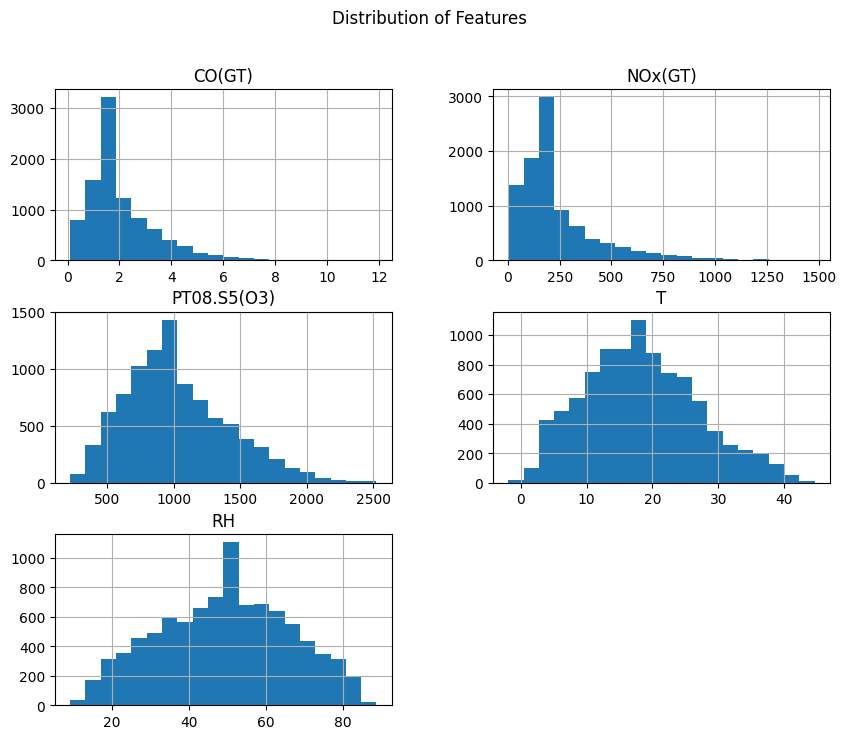

In [21]:
# Visualizing the distribution of features
Features = ['CO(GT)', 'NOx(GT)', 'PT08.S5(O3)', 'T', 'RH']
data_df[Features].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distribution of Features')
plt.show()

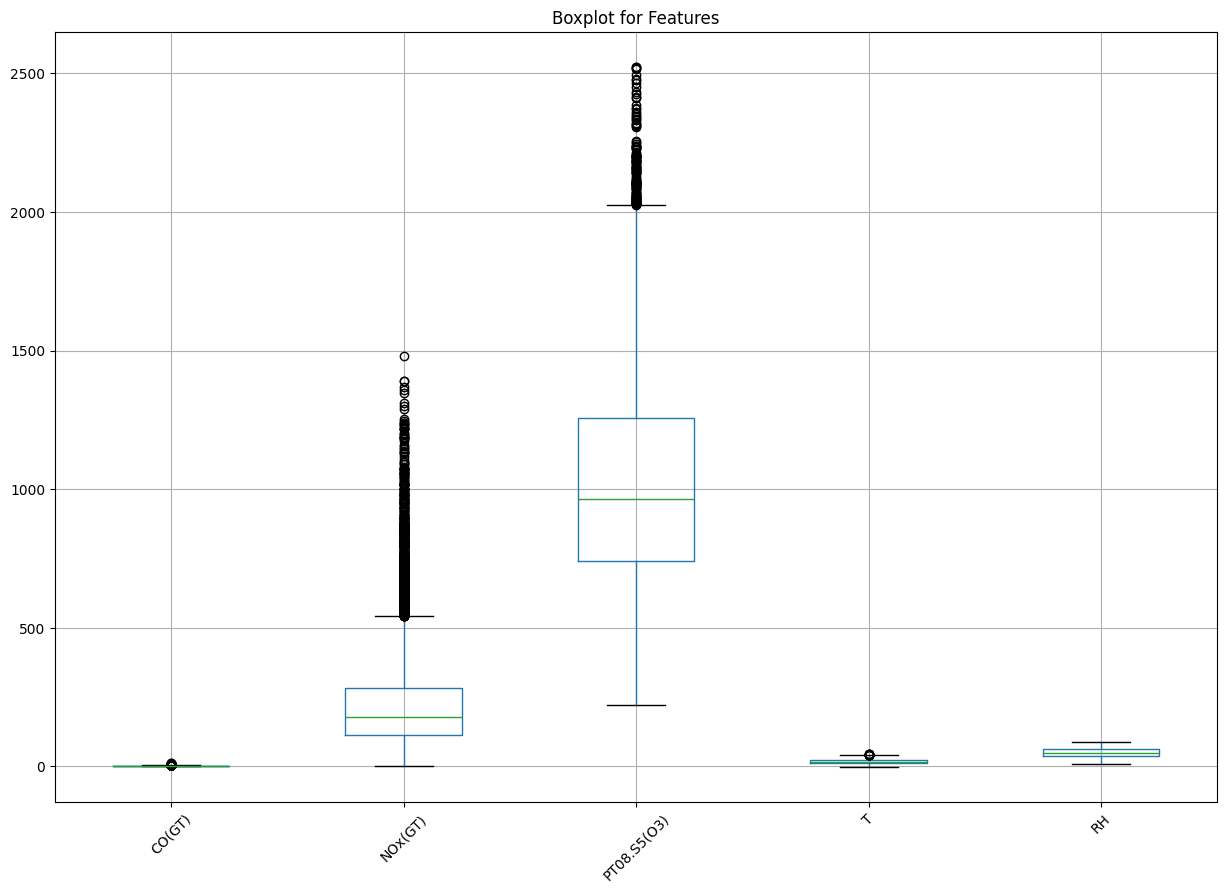

In [22]:
# Boxplot for the data
plt.figure(figsize=(15, 10))
data_df[Features].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot for Features')
plt.show()

The visualization shows that most of the data is skewed to the right. This means that the data may contain outliers which will affect the quality of my analysis and prediction modelling. Let us remove the outliers using log transformation.

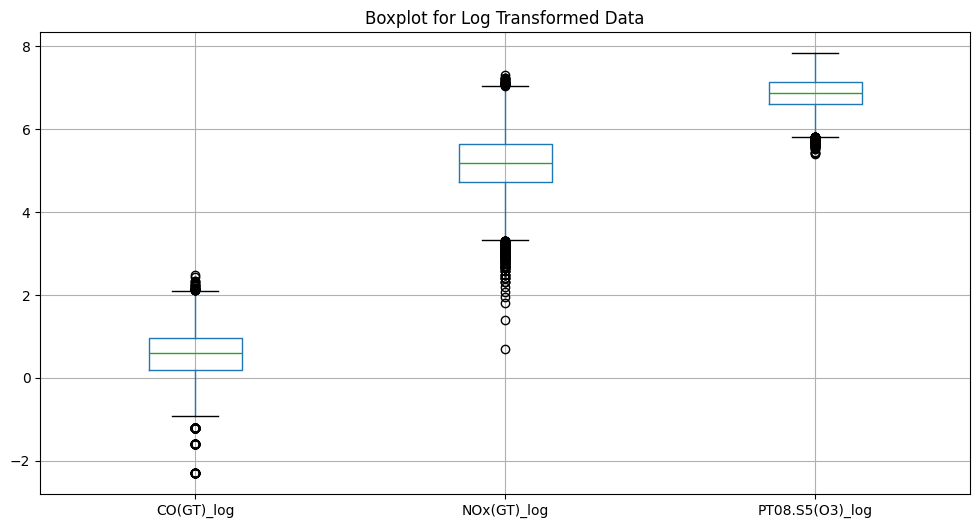

In [23]:
# Log Transform the columns with positive skewness
data_df['CO(GT)_log'] = np.log(data_df['CO(GT)'])
data_df['NOx(GT)_log'] = np.log(data_df['NOx(GT)'])
data_df['PT08.S5(O3)_log'] = np.log(data_df['PT08.S5(O3)'])

# Visualizing the log-transformed data
plt.figure(figsize=(12, 6))
data_df[['CO(GT)_log', 'NOx(GT)_log', 'PT08.S5(O3)_log']].boxplot()
plt.title('Boxplot for Log Transformed Data')
plt.show()

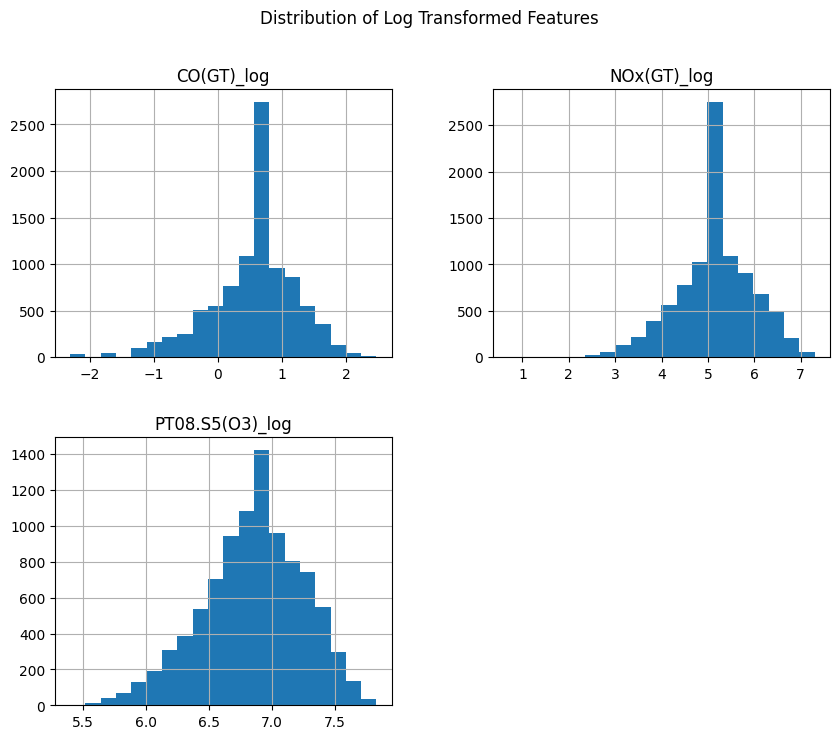

In [24]:
# Visualizing the distribution using a histogram

data_df[['CO(GT)_log', 'NOx(GT)_log', 'PT08.S5(O3)_log']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distribution of Log Transformed Features')
plt.show()

Looks better! Let's continue.

In [25]:
# Standardize the data
log_pollutants = ['CO(GT)_log', 'NOx(GT)_log', 'PT08.S5(O3)_log']
df_pollutants = data_df[log_pollutants]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pollutants)
df_scaled = pd.DataFrame(df_scaled, columns=log_pollutants)


In [26]:
# Select the columns to merge from the initial dataframe data_df
columns_to_merge = ['Date', 'Month', 'Day', 'Hour', 'T', 'RH']
df_to_merge = data_df[columns_to_merge]

# Concatenate the selected columns with the scaled pollutant data
df_combined = pd.concat([df_to_merge, df_scaled], axis=1)

# Display the combined dataframe
print(df_combined.head())

        Date  Month        Day  Hour      T         RH  CO(GT)_log  \
0 2004-03-10  March  Wednesday    18  13.60  48.875001    0.626146   
1 2004-03-10  March  Wednesday    19  13.30  47.700000    0.229672   
2 2004-03-10  March  Wednesday    20  11.90  53.975000    0.373701   
3 2004-03-10  March  Wednesday    21  11.00  60.000000    0.373701   
4 2004-03-10  March  Wednesday    22  11.15  59.575001   -0.107534   

   NOx(GT)_log  PT08.S5(O3)_log  
0    -0.060673         0.734276  
1    -0.654523         0.068423  
2    -0.355310         0.318335  
3    -0.016492         0.603660  
4    -0.355310         0.401118  


In [27]:
data_df = df_combined

In [28]:
data_df.describe()


,Date,Hour,T,RH,CO(GT)_log,NOx(GT)_log,PT08.S5(O3)_log
count,9357,9357.000000,9357.000000,9357.000000,9.357000e+03,9.357000e+03,9.357000e+03
mean,2004-09-21 04:30:05.193972480,11.498557,18.293913,49.244785,-1.275742e-16,-6.743208e-16,-1.716177e-16
min,2004-03-10 00:00:00,0.000000,-1.900000,9.175000,-4.297364e+00,-5.559014e+00,-3.651298e+00
25%,2004-06-16 00:00:00,5.000000,12.025000,36.550000,-5.422685e-01,-5.502888e-01,-6.110189e-01
50%,2004-09-21 00:00:00,11.000000,17.750000,49.550000,7.045481e-02,3.869357e-02,4.507165e-02
75%,2004-12-28 00:00:00,18.000000,24.075000,61.875000,6.261464e-01,6.083730e-01,7.098908e-01
max,2005-04-04 00:00:00,23.000000,44.600000,88.725000,2.924664e+00,2.660767e+00,2.462511e+00
std,NaN,6.923182,8.659092,16.974420,1.000053e+00,1.000053e+00,1.000053e+00


In [29]:
data_df.head()

,Date,Month,Day,Hour,T,RH,CO(GT)_log,NOx(GT)_log,PT08.S5(O3)_log
0,2004-03-10,March,Wednesday,18,13.60,48.875001,0.626146,-0.060673,0.734276
1,2004-03-10,March,Wednesday,19,13.30,47.700000,0.229672,-0.654523,0.068423
2,2004-03-10,March,Wednesday,20,11.90,53.975000,0.373701,-0.355310,0.318335
3,2004-03-10,March,Wednesday,21,11.00,60.000000,0.373701,-0.016492,0.603660
4,2004-03-10,March,Wednesday,22,11.15,59.575001,-0.107534,-0.355310,0.401118


Great! Let's continue. Based on the objectives, we will analyze the correlation between pollutants and meteorological data.

Pollutants: CO(GT) , NOx and PTO8.S5(O3)    
Meteorological data: T and RH

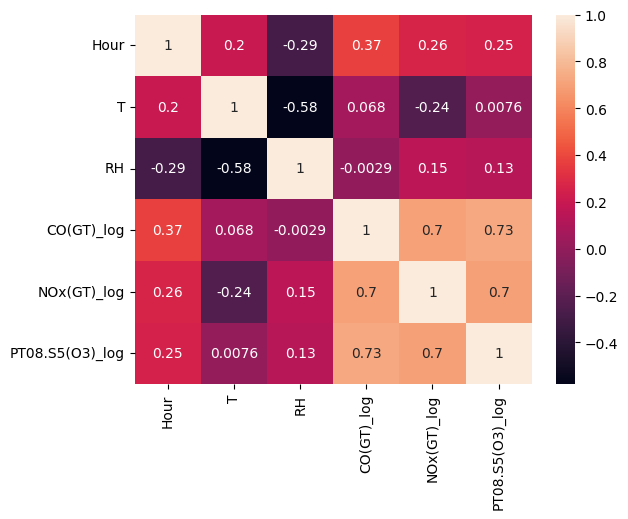

In [30]:
# Determine the correlation between the variables
correlation_matrix = data_df.select_dtypes(include=[np.number]).corr()
correlation_matrix              
sns.heatmap(correlation_matrix, annot=True)
plt.show()


1. All the diagonal elements have a correlation of 1 since they represent the correlation of each variable with itself.

2. Correlation Coefficients: The values range from -1 to 1:
   +1 : indicates a perfect positive correlation: as one variable increases, the other also increases.
   -1 indicates a perfect negative correlation: as one variable increases, the other decreases.
   0 indicates no correlation: changes in one variable do not predict changes in the other.

**Observations**

- Hour:
  - Positively correlated with `CO(GT)_log` (0.37), `NOx(GT)_log` (0.26), and `PT08.S5(O3)_log` (0.25). This suggests that as the hour of the day increases, there tends to be an increase in the log-transformed levels of these pollutants.
  - Negatively correlated with `RH` (-0.29), indicating that as the hour increases, relative humidity tends to decrease.

- `T` (Temperature):
  - Strongly negatively correlated with `RH` (-0.58), meaning higher temperatures are associated with lower relative humidity.
  - Weak positive correlations with the pollutant variables: `CO(GT)_log` (0.068), `NOx(GT)_log` (-0.24), and `PT08.S5(O3)_log` (0.0076), indicating a minimal relationship between temperature and these pollutants in log scale.

- `RH` (Relative Humidity):
  - Strong negative correlation with `T` (-0.58) as mentioned above.
  - Very weak correlations with the log-transformed pollutant variables: `CO(GT)_log` (-0.0029), `NOx(GT)_log` (0.15), and `PT08.S5(O3)_log` (0.13), suggesting that relative humidity has little to no relationship with these pollutants in log scale.

- Pollutant Variables:
  - `CO(GT)_log` has a strong positive correlation with `NOx(GT)_log` (0.7) and `PT08.S5(O3)_log` (0.73). This suggests that carbon monoxide levels are strongly associated with nitrogen oxides and ozone levels in log scale.
  - `NOx(GT)_log` is also strongly positively correlated with `PT08.S5(O3)_log` (0.7), indicating that nitrogen oxide levels are closely related to ozone levels in log scale.

**Implications**

- Pollutant Interrelations: The strong positive correlations between the log-transformed pollutant variables (`CO(GT)_log`, `NOx(GT)_log`, and `PT08.S5(O3)_log`) suggest that they are often elevated together, potentially due to common sources or atmospheric conditions.
  
- Temperature and Humidity: The strong negative correlation between temperature (`T`) and relative humidity (`RH`) aligns with general atmospheric behavior, where warmer air can hold more moisture, reducing relative humidity.

- Hourly Patterns: The moderate positive correlations of `Hour` with some pollutants suggest that certain times of the day might see increased pollutant levels, potentially due to traffic patterns, industrial activity, or other diurnal factors.

This correlation matrix provides a useful overview of how different environmental factors and pollutants are related in the dataset.

We will proceed to prediction modelling

### Prediction Modelling


I will use Linear Regression, Decision Trees and Timeseries  to develop a predictive model. I found that these would be the most suitable to carry out pollution prediction.

#### Time Series on Air Quality Data
Since one of the questions I'm interested is seeing if there are certain days/months that have worse pollution than others, I'll add a 'day' column to my dataframe before anything else.

Let's start visualizing stuff! I'm going to start by checking the CO concentrations on a monthly, daily and hourly basis.

In [31]:
month_df_list = []
day_df_list   = []
hour_df_list  = []

months = ['January','February','March', 'April', 'May','June', 
          'July', 'August', 'September', 'October', 'November', 'December']

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for month in months:
    temp_df = data_df.loc[(data_df['Month'] == month)]
    month_df_list.append(temp_df)

for day in days:
    temp_df = data_df.loc[(data_df['Day'] == day)]
    day_df_list.append(temp_df)

for hour in range(24):
    temp_df = data_df.loc[(data_df['Hour'] == hour)]
    hour_df_list.append(temp_df)
    


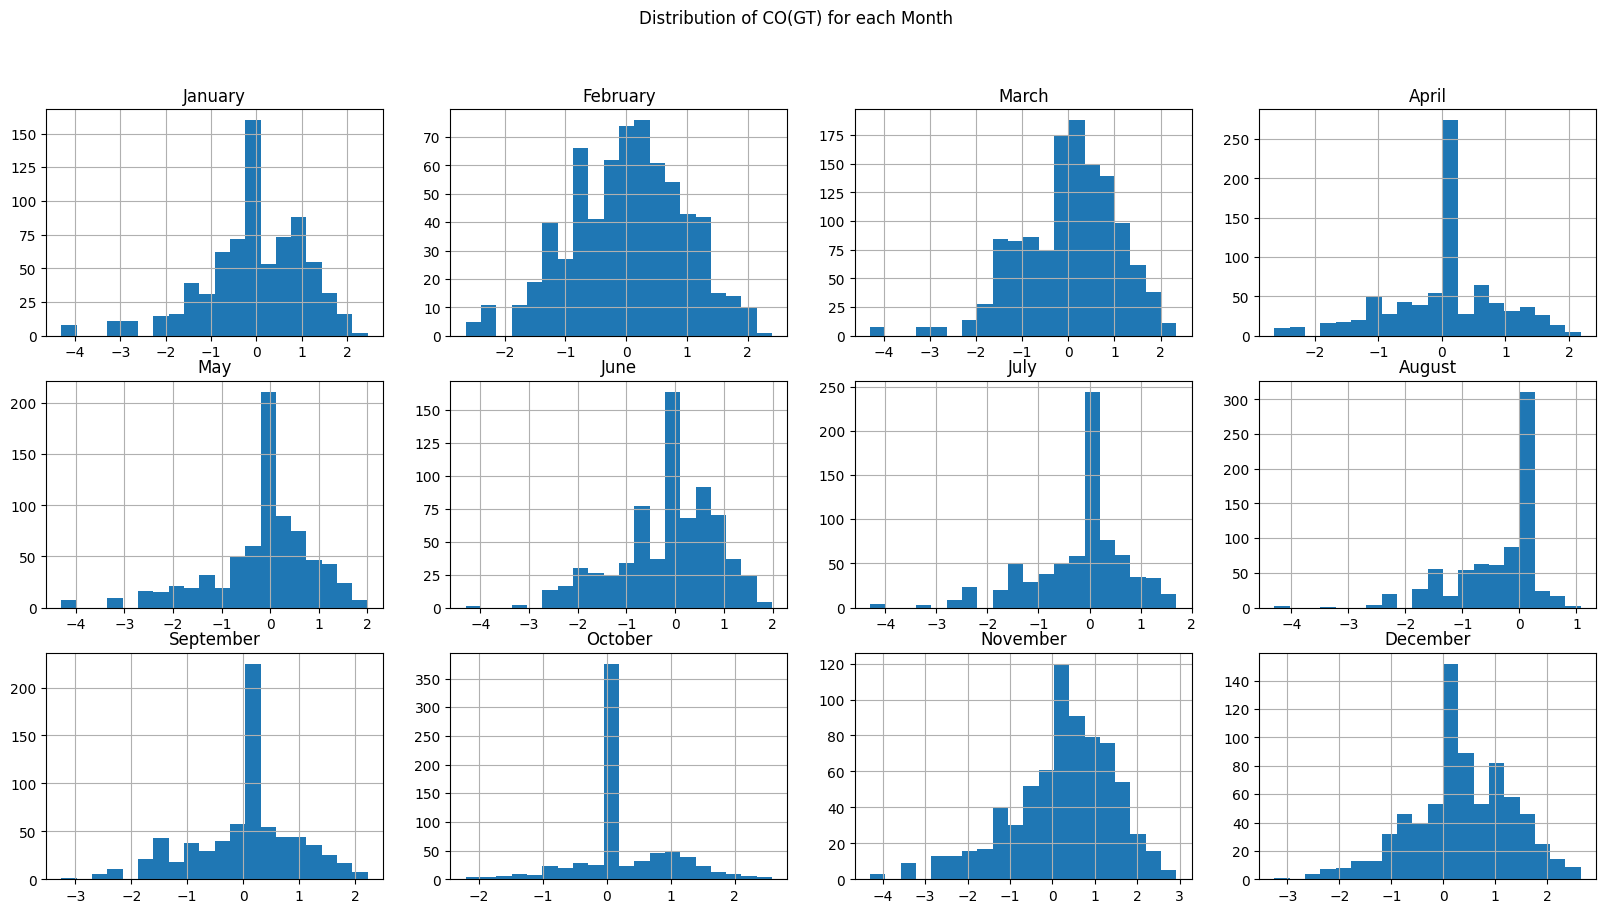

In [32]:
# Plot the distribution of CO(GT) for each month
plt.figure(figsize=(20, 10))
for i in range(12):
    plt.subplot(3, 4, i+1)
    month_df_list[i]['CO(GT)_log'].hist(bins=20)
    plt.title(months[i])
plt.suptitle('Distribution of CO(GT) for each Month')
plt.show()

January through March: The CO(GT) distribution appears to have a peak around certain times.
April through June: The distribution seems to be more spread out.
July through September: There’s another peak, indicating higher CO(GT) levels during these months.
October through December: The distribution shows variability
Let us further analyze the data

In [33]:
def df_time_plotter(df_list, time_unit, y_col):
    
    months = ['January','February','March', 'April', 'May','June', 
              'July', 'August', 'September', 'October', 'November', 'December']
    
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    if time_unit == 'M':
        nRows = 3
        nCols = 4
        n_iter = len(months)
    elif time_unit == 'D':
        nRows = 2
        nCols = 4
        n_iter = len(days)
    elif time_unit == 'H':
        nRows = 4
        nCols = 6
        n_iter = 24
    else:
        print('time_unit must be a string equal to M,D, or H')
        return 0
        
    fig, axs = plt.subplots(nrows=nRows, ncols=nCols, figsize = (40,30))
    axs = axs.ravel()
    for i in range(n_iter):
        data = df_list[i]
        ax = axs[i]
        data.plot(kind ='scatter', x = 'DateTime', y= y_col , ax = ax, fontsize = 24)
        ax.set_ylabel('Pollutant Concentration',fontsize=30)
        ax.set_xlabel('')
        if time_unit == 'M':
            ax.set_title(y_col + ' ' + months[i],  size=40) # Title
        elif time_unit == 'D':
            ax.set_title(y_col + ' ' + days[i],  size=40) # Title
        else:
             ax.set_title(y_col + ' ' + str(i),  size=40) # Title
        ax.tick_params(labelrotation=60)

        #plt.xlim([datetime.date(2004, 3, 10), datetime.date(2004, 3, 30)])
    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
    plt.show() 

Let's see how the the CO levels change every month

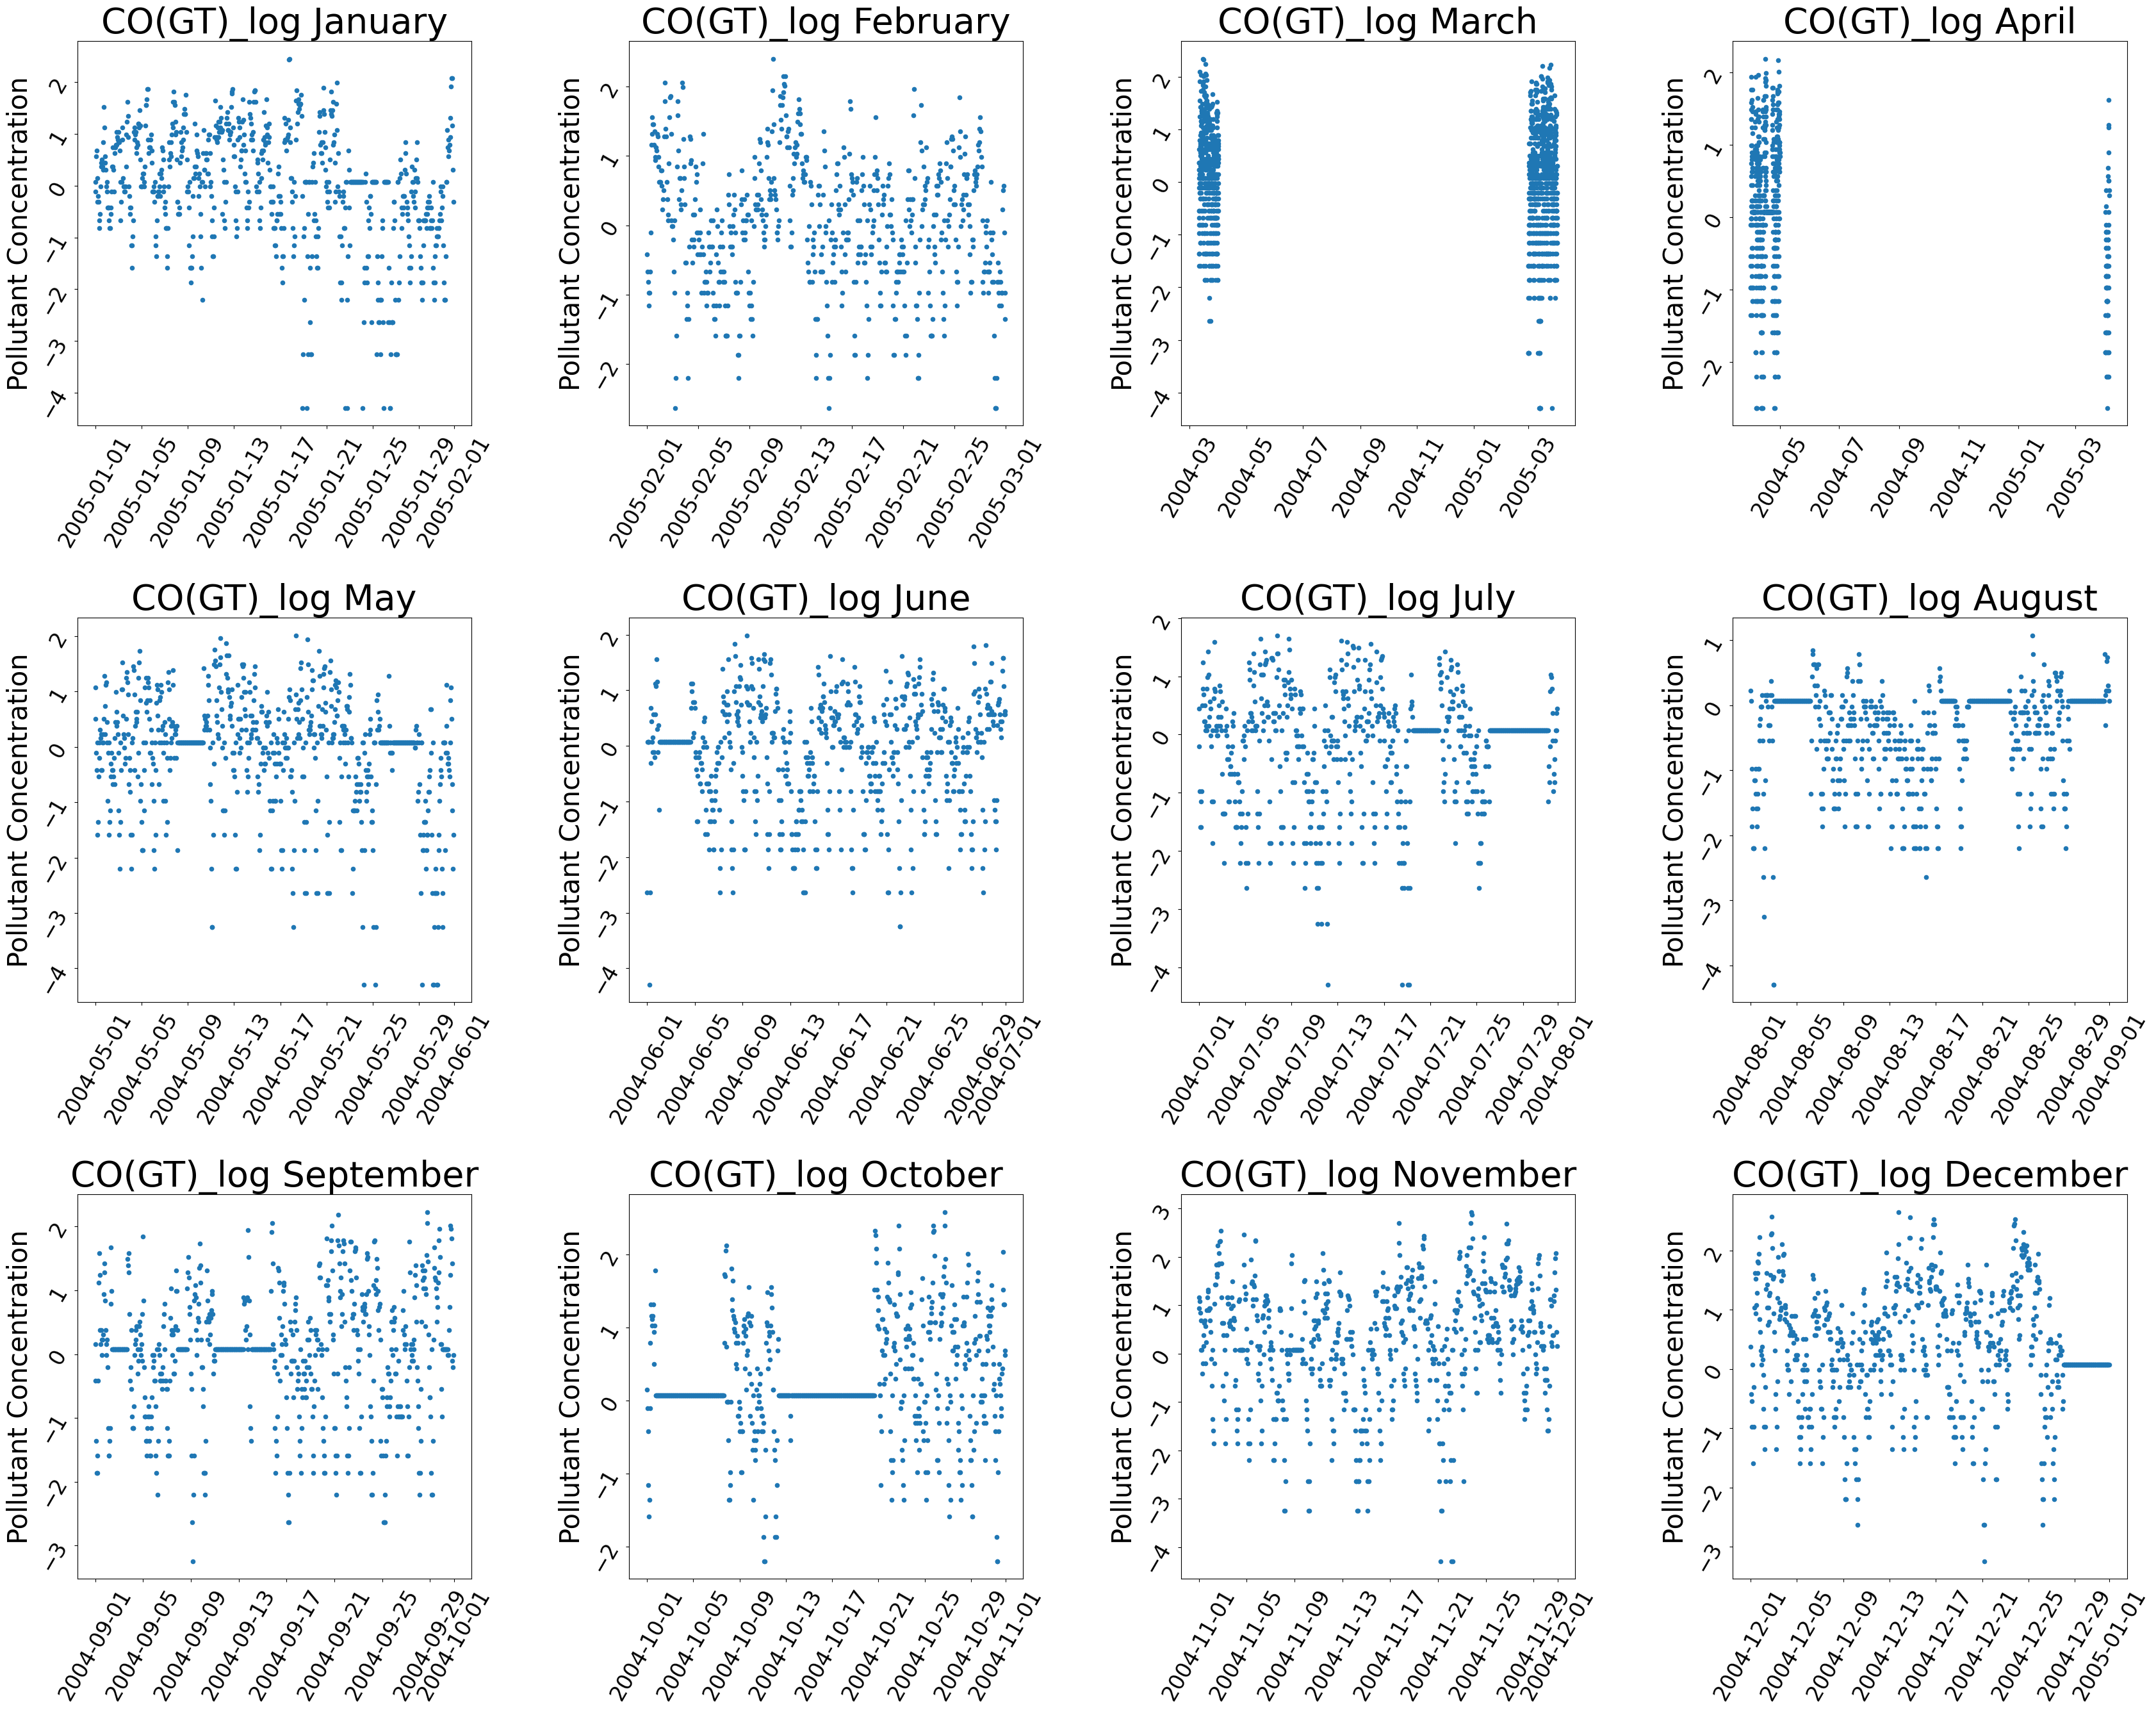

In [34]:
# Create 'DateTime' column by combining 'Date' and 'Hour'
data_df['DateTime'] = pd.to_datetime(data_df['Date'].astype(str) + ' ' + data_df['Hour'].astype(str) + ':00:00')

# Ensure 'DateTime' column is created before using it in the function
month_df_list = []
for month in months:
    temp_df = data_df.loc[(data_df['Month'] == month)]
    month_df_list.append(temp_df)

# Plot the data
df_time_plotter(month_df_list, 'M', 'CO(GT)_log')


The CO levels are highest in November and December. The sensors had a lot of missing/bad readings on March and April. Let's see how the concentrations change for every day of the week

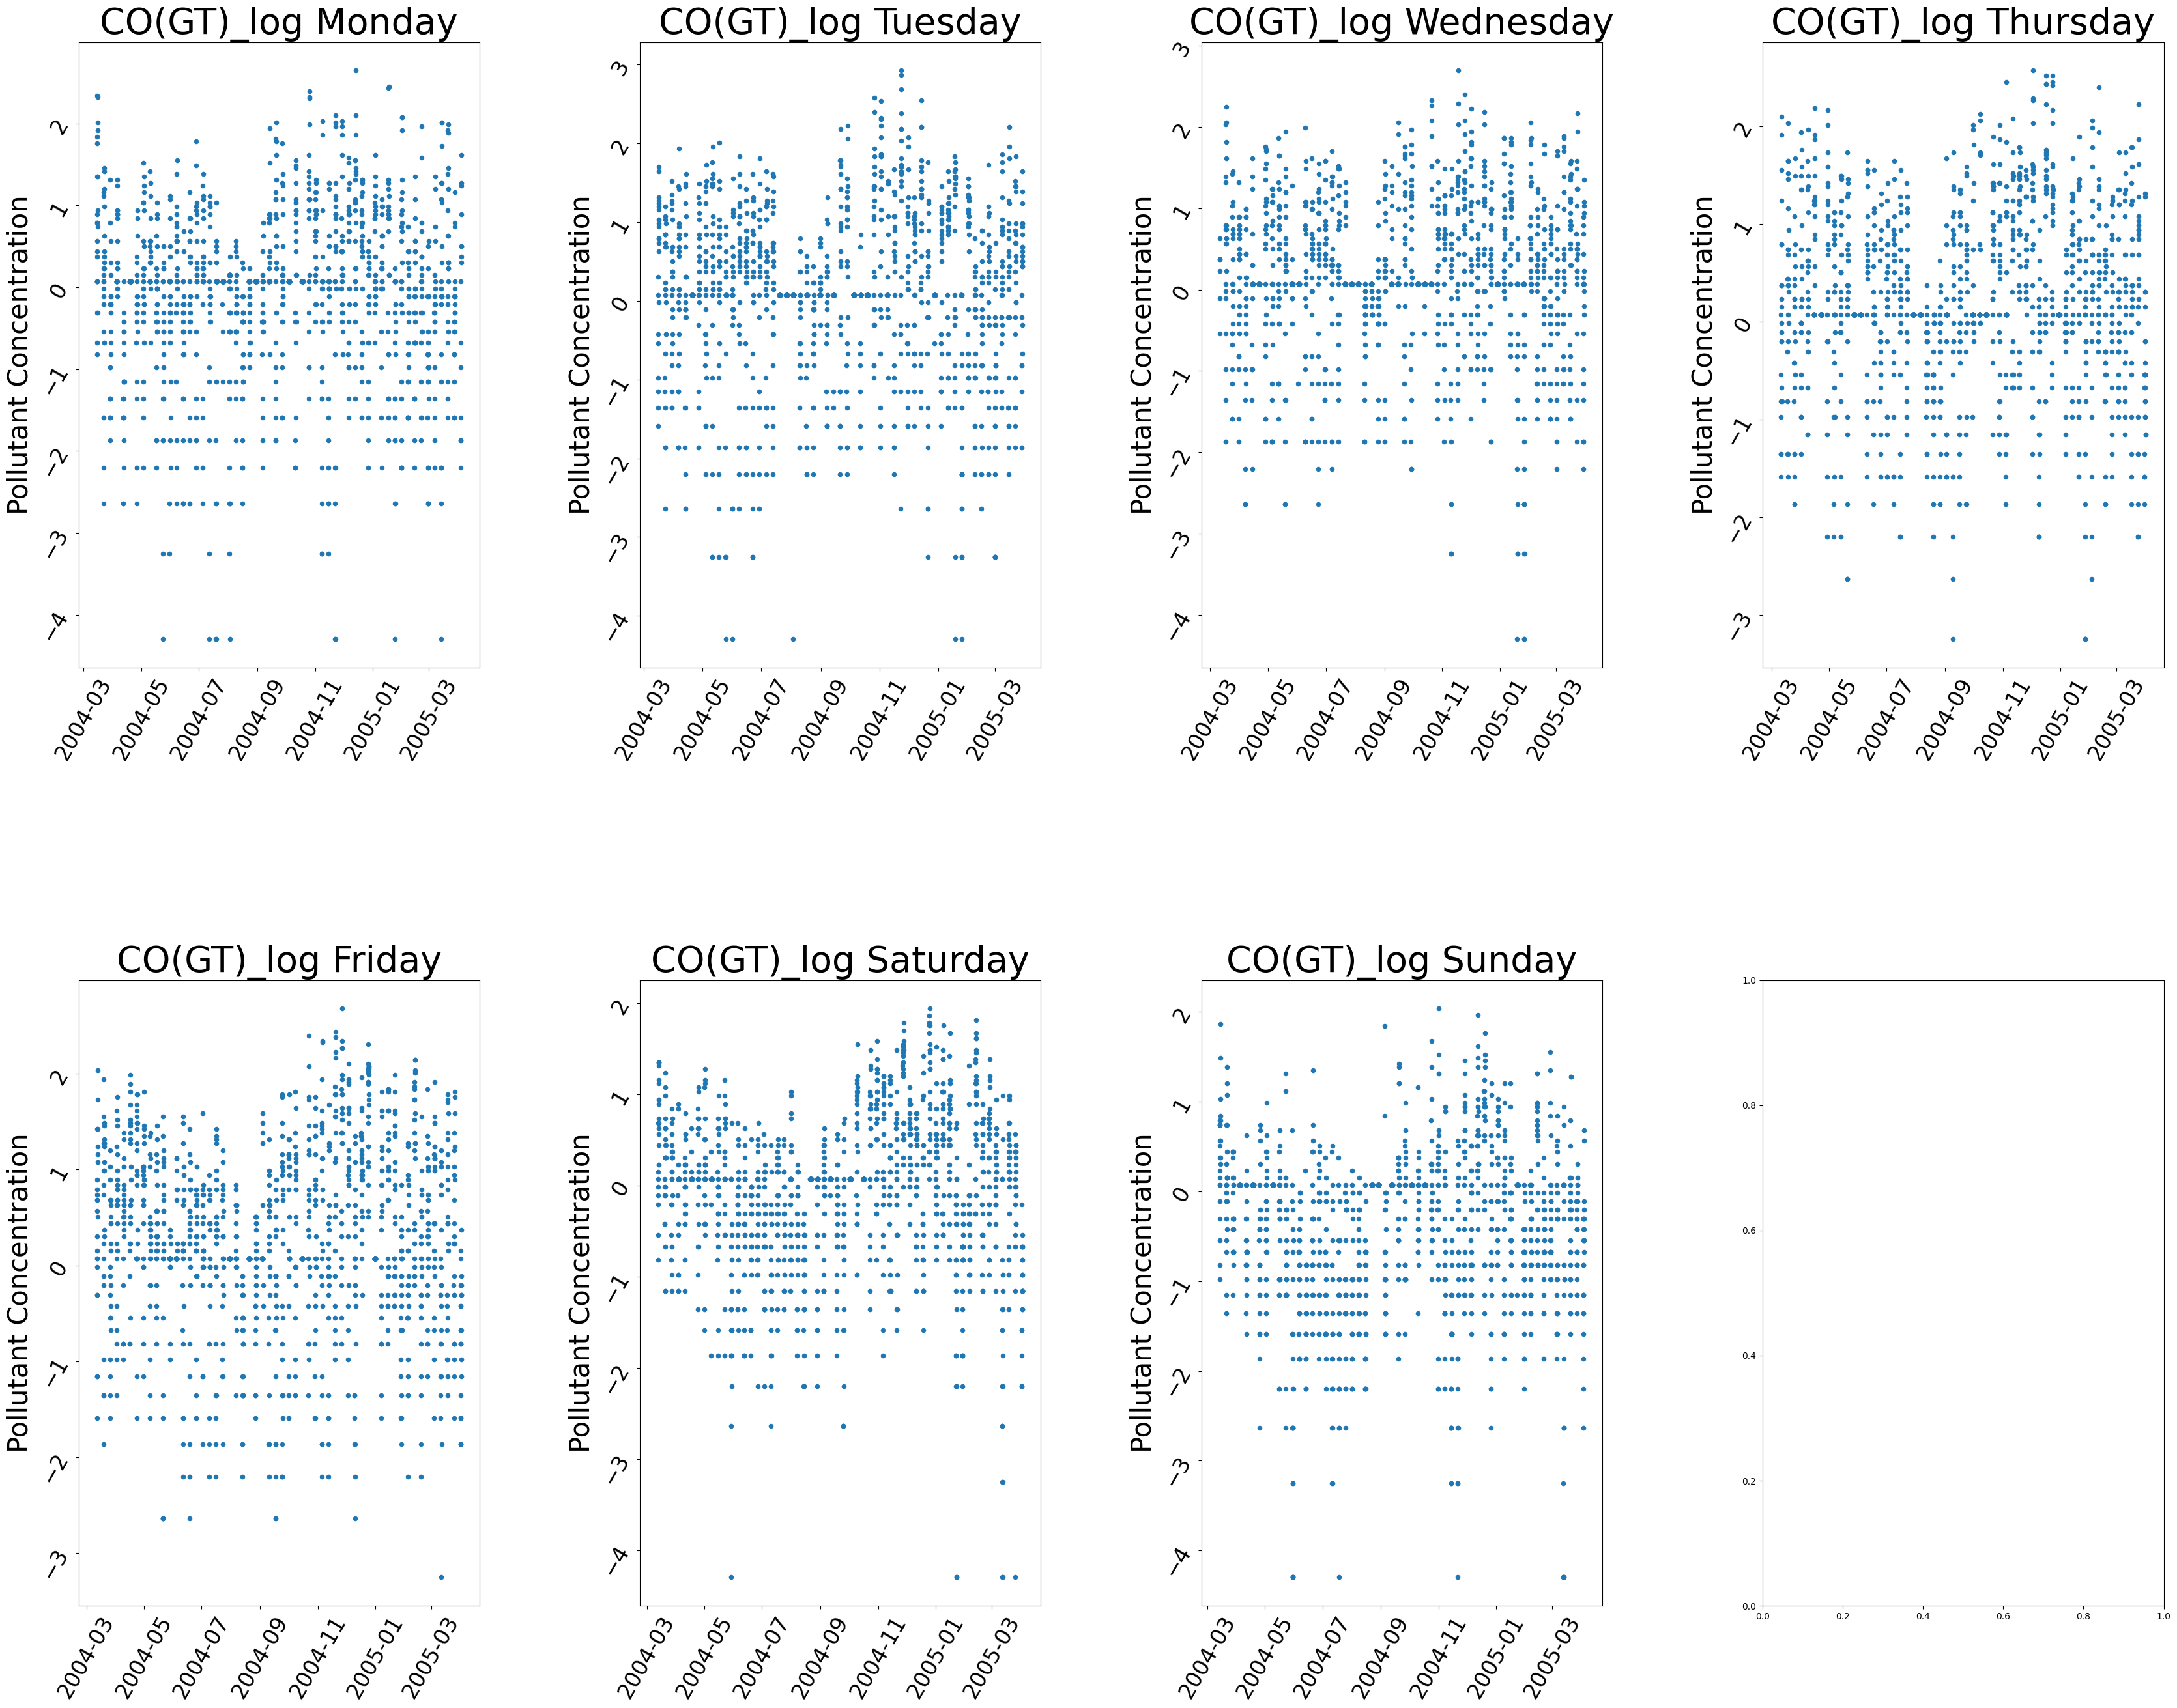

In [35]:
# Ensure 'DateTime' column is created before using it in the function
data_df['DateTime'] = pd.to_datetime(data_df['Date'].astype(str) + ' ' + data_df['Hour'].astype(str) + ':00:00')

# Recreate day_df_list with the updated dataframe
day_df_list = []
for day in days:
    temp_df = data_df.loc[(data_df['Day'] == day)]
    day_df_list.append(temp_df)

# Plot the data
df_time_plotter(day_df_list, 'D', 'CO(GT)_log')


The CO levels are evenly distributed throughout the week.

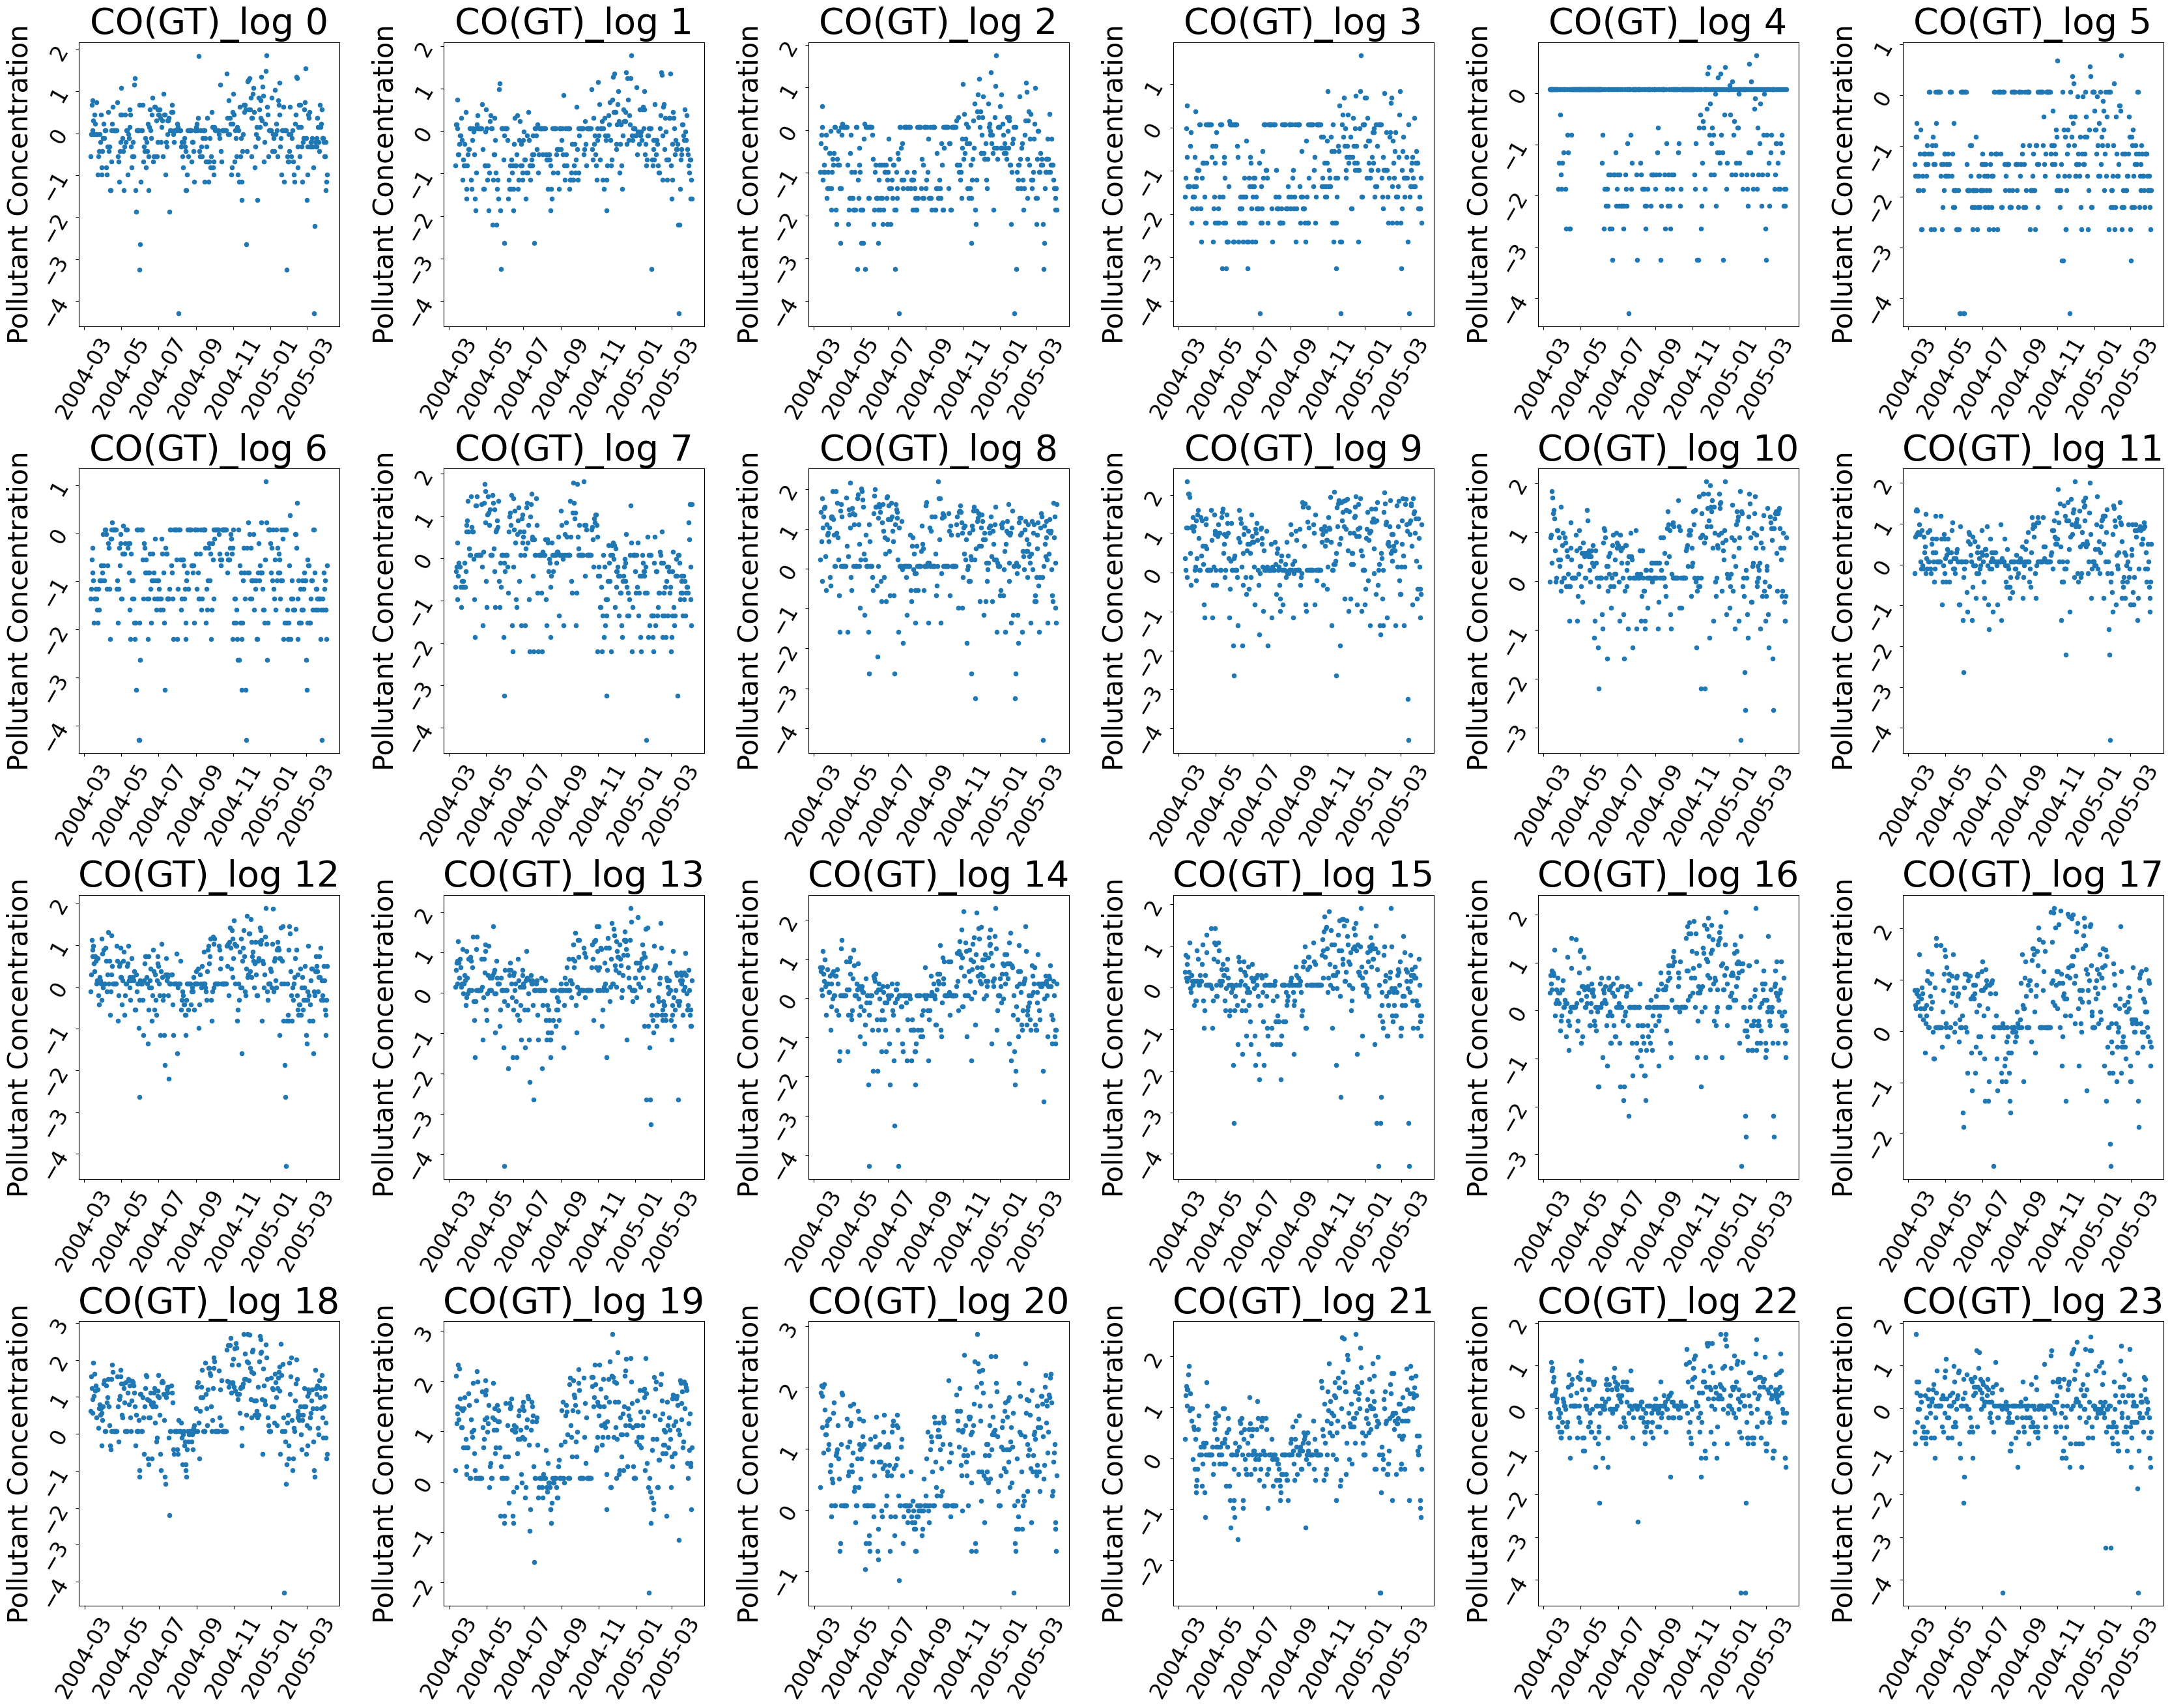

In [36]:
# Ensure 'DateTime' column is created before using it in the function
data_df['DateTime'] = pd.to_datetime(data_df['Date'].astype(str) + ' ' + data_df['Hour'].astype(str) + ':00:00')

# Recreate hour_df_list with the updated dataframe
hour_df_list = []
for hour in range(24):
    temp_df = data_df.loc[(data_df['Hour'] == hour)]
    hour_df_list.append(temp_df)

# Plot the data
df_time_plotter(hour_df_list, 'H', 'CO(GT)_log')


It looks like readings are quite low between 4-6 AM. The CO levels rise starting at 1PM and peak at around 6-8pm. Maybe a bar plot will make some of these relationships more apparent

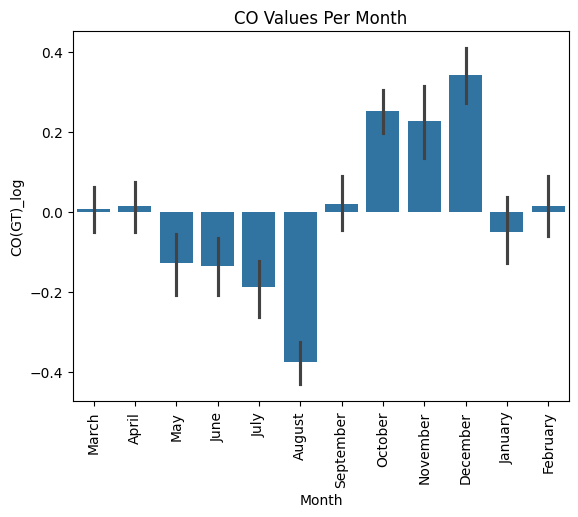

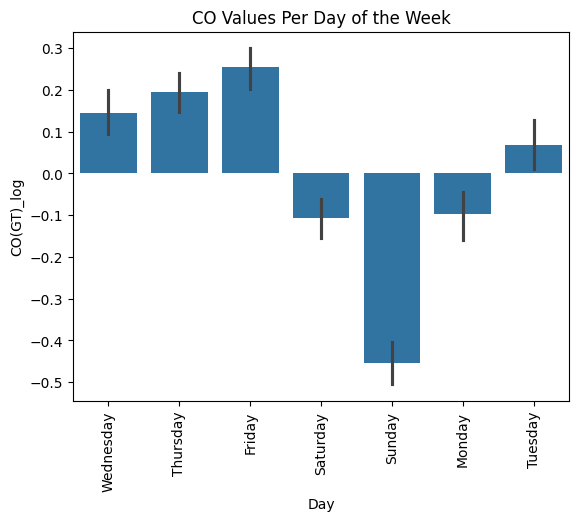

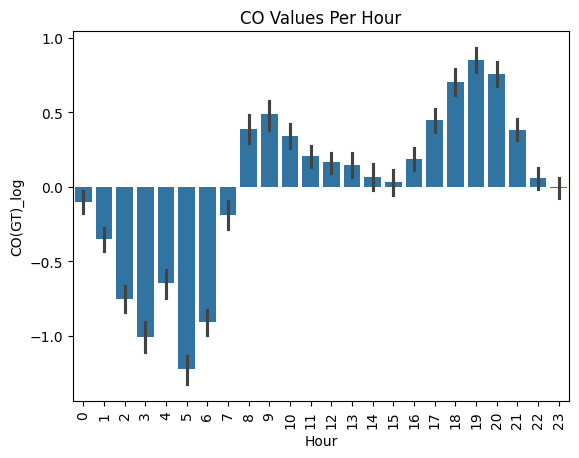

In [37]:
sns.barplot(x = 'Month', y = 'CO(GT)_log', data = data_df)
plt.title('CO Values Per Month')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x = 'Day', y = 'CO(GT)_log', data = data_df)
plt.title('CO Values Per Day of the Week')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x = 'Hour', y = 'CO(GT)_log', data = data_df)
plt.title('CO Values Per Hour')
plt.xticks(rotation=90)
plt.show()

From these plots we can see the following:  

**Months**  
Higher CO Levels: Months like January, February, and March have higher average CO levels.
Lower CO Levels: June, July, and August exhibit lower average CO levels. 

**Day**     
CO levels are lowest on Sundays and highest on Friday.

**Hour**    
CO Levels: Certain hours (e.g., early morning or late evening) may have higher average CO levels. This pattern could be related to factors like traffic and industrial activity.
Lower CO Levels: Other hours (e.g., midday or midnight) exhibit lower average CO levels.

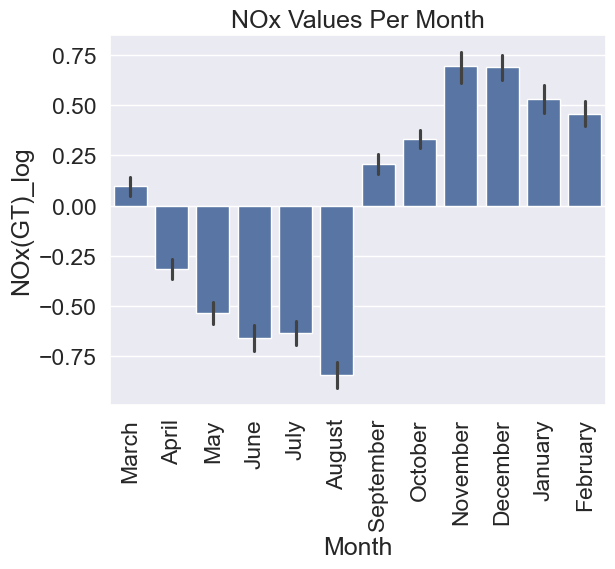

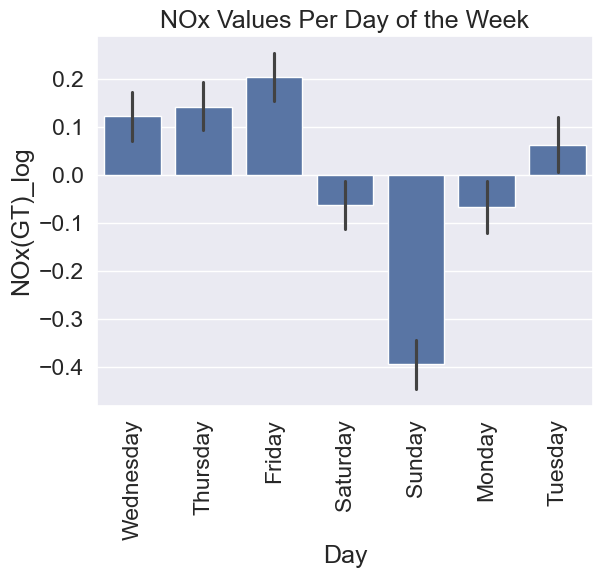

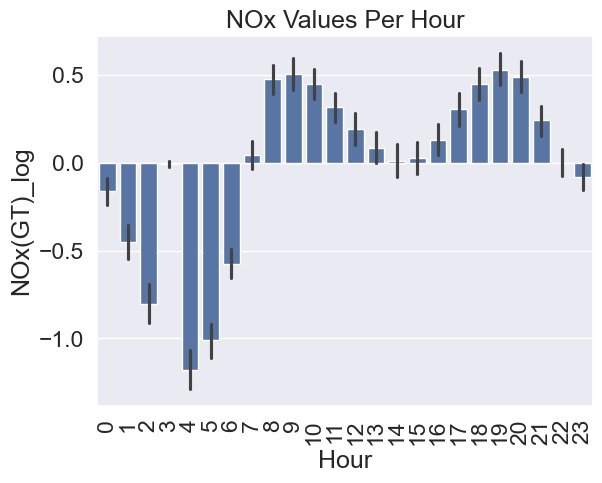

In [39]:
sns.barplot(x = 'Month', y = 'NOx(GT)_log', data = data_df)
plt.title('NOx Values Per Month')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x = 'Day', y = 'NOx(GT)_log', data = data_df)
plt.title('NOx Values Per Day of the Week')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x = 'Hour', y = 'NOx(GT)_log', data = data_df)
plt.title('NOx Values Per Hour')
plt.xticks(rotation=90)
plt.show()

**Month**
Higher NOx Levels: Certain months (e.g., January, February, and March) have higher average NOx levels.
Lower NOx Levels: Other months (e.g., June, July, and August) exhibit lower average NOx levels.
This pattern could be related to factors like weather conditions, industrial emissions, or seasonal variations

**Day**
Higher NOx Levels: Monday, Tuesday, and Wednesday have higher NOx(GT) values. This might be due to increased traffic and industrial activity.
Lower NOx Levels: Thursday, Friday, Saturday, and Sunday exhibit lower NOx(GT) values. This could result from reduced traffic or different sources of pollution


**Hour**
Peak Hours: Certain hours (e.g., early morning and late evening) exhibit higher average NOx levels.
Lower Levels: Midday and midnight tend to have lower average NOx levels.
This pattern could be related to factors like traffic, industrial emissions, or atmospheric conditions


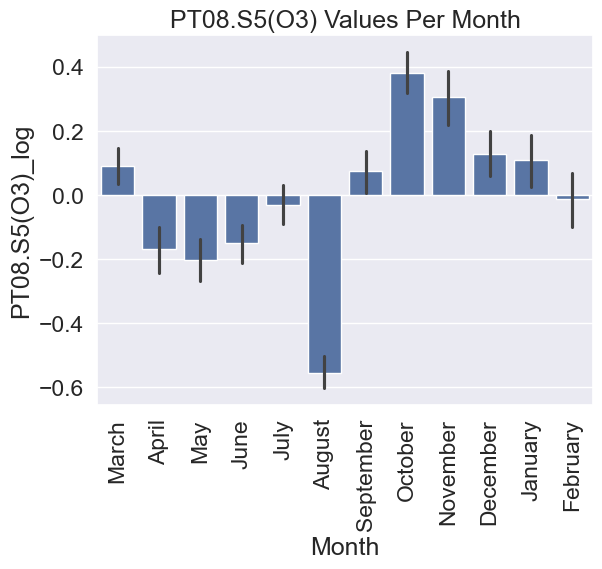

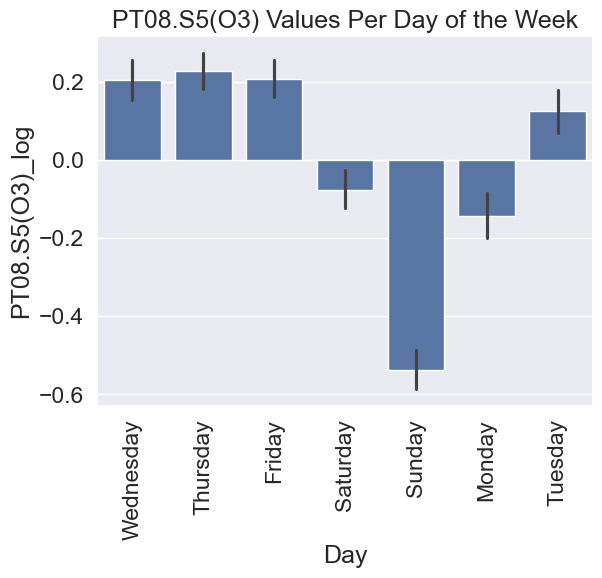

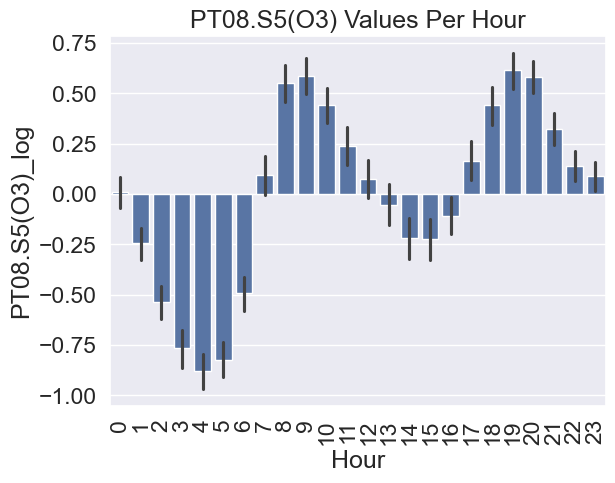

In [40]:
sns.barplot(x = 'Month', y = 'PT08.S5(O3)_log', data = data_df)
plt.title('PT08.S5(O3) Values Per Month')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x = 'Day', y = 'PT08.S5(O3)_log', data = data_df)
plt.title('PT08.S5(O3) Values Per Day of the Week')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x = 'Hour', y = 'PT08.S5(O3)_log', data = data_df)
plt.title('PT08.S5(O3) Values Per Hour')
plt.xticks(rotation=90)
plt.show()

**Month**
Higher Levels: Months like January, February, and March have higher average PT08.S5(O3) values.
Lower Levels: July exhibits a particularly low average PT08.S5(O3) value compared to other months.
Seasonal patterns may be the reason for this

**Day**
Higher Levels: Some days (e.g., Monday, Tuesday, and Wednesday) have higher average PT08.S5(O3) values.
Lower Levels: Other days (e.g., Thursday, Friday, Saturday, and Sunday) exhibit lower average PT08.S5(O3) values.
This pattern could be related to factors like traffic, industrial emissions and working during the week.

**Hour**
Peak Hours: Certain hours (e.g., early morning and late evening) exhibit higher average PT08.S5(O3) values.
Lower Levels: Midday and midnight tend to have lower average PT08.S5(O3) values.
This pattern could be related to factors like traffic, weather, or industrial emissions



The pollutants appear to have a similar effect across the different months, days and hours during the period in which this project was carried out.

#### Splitting Data and Building Models
I have different variables I want to predict. We will need to split the data into test and train features and targets. The train values will be used by the model to learn the patterns while the test values will be used to determine whether the model has understood the patterns

In [41]:
# Split the data into features and target variable
data_df = data_df. copy()

# Define the target variable
target = data_df[['CO(GT)_log', 'NOx(GT)_log', 'PT08.S5(O3)_log']]

# Define the features
features = data_df[['Hour', 'T', 'RH']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [42]:
# Create a linear regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Make predictions using the test data
y_pred_lr = linear_reg.predict(X_test)

In [43]:
# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print('Mean Squared Error:', mse_lr)
print('R^2:', r2_lr)
print('Mean Absolute Error:', mae_lr)

Mean Squared Error: 0.830766961808815
R^2: 0.16716579235817128
Mean Absolute Error: 0.7182713690911394


In [44]:
# Create a Decision Tree Regressor model
decision_tree = DecisionTreeRegressor()

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Make predictions using the test data
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print('Mean Squared Error:', mse_dt)
print('R^2:', r2_dt)
print('Mean Absolute Error:', mae_dt)


Mean Squared Error: 1.1515604343988055
R^2: -0.15442022380487241
Mean Absolute Error: 0.8100564420204369


In [45]:
# Determine the feature importances

feature_importances = decision_tree.feature_importances_
for feature, importance in zip(features.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance:.2f}")


Feature: Hour, Importance: 0.31
Feature: T, Importance: 0.34
Feature: RH, Importance: 0.35


Let's check the best depth parameter for our decision tree

**Linear Regression Model Results**

1. Mean Squared Error (MSE):`0.8308`
   - MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit. An MSE of `0.8308` suggests that, on average, the square of the errors is about `0.8308`. This value alone doesn't tell us if it's good or bad without context on the scale of your target variables.

2. R-squared (R²): `0.1672`
   - R² represents the proportion of variance in the dependent variable that is predictable from the independent variables. An R² of `0.1672` indicates that only about `16.7%` of the variance in the pollutant data is explained by the model. This is relatively low, suggesting that the model does not explain much of the variability in the target variable and may not be capturing the relationship well.

3. Mean Absolute Error (MAE):`0.7183`
   - MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the average absolute difference between the predicted and actual values. An MAE of `0.7183` indicates that, on average, the predictions are off by about `0.7183` units. This should be interpreted relative to the range of your data.

**Decision Tree Model Results**

1. Mean Squared Error (MSE): `1.1385`
   - For the Decision Tree model, the MSE is `1.1385`. This is higher than the Linear Regression model’s MSE. This suggests that, on average, the Decision Tree model's predictions have a larger error squared than those of the Linear Regression model, indicating a worse performance.

2. R-squared (R²): `-0.1413`
   - An R² of `-0.1413` is worse than `0`. This means that the model is performing worse than a horizontal line at the mean of the target values would (a naive model). This indicates that the Decision Tree model is not useful for predicting the target variables in your data and suggests significant overfitting or other issues.

3. Mean Absolute Error (MAE):`0.8057`
   - The MAE for the Decision Tree model is `0.8057`, which is slightly worse than the MAE for the Linear Regression model. This again indicates that the Decision Tree model is not performing as well.

**Feature Importances (Decision Tree)**

- Feature: Hour, Importance: 0.31
- Feature: T, Importance: 0.34
- Feature: RH, Importance: 0.35

These values indicate the relative importance of each feature in making predictions with the Decision Tree model.
- `RH` (Relative Humidity) has the highest importance (`0.35`), followed by temperature `T` (`0.34`), and then `Hour` (`0.31`).
- This suggests that the Decision Tree model relies somewhat evenly on all three features, with a slight preference for `RH` over `T` and `Hour`.

**Interpretation**

Based on my results, both models have relatively low performance for my prediction task:

- Linear Regression performs better than the Decision Tree, but the R² value indicates that there might be other important factors or non-linear relationships that the model isn't capturing.
- Decision Tree performance is notably poor, suggesting issues like overfitting, a lack of complexity in the model, or an unsuitable depth/structure for your data.

**What next??**

1. Feature Engineering: Consider adding or engineering additional features that may capture the underlying patterns in the data better.

2. Model Tuning: For the Decision Tree, I could try tuning hyperparameters (like tree depth) to prevent overfitting. I could also use ensemble methods like Random Forest or Gradient Boosting, which usually perform better than single Decision Trees.

3. Try Models: Models such as Support Vector Machines, k-Nearest Neighbors, or even neural networks for is large and complex enough.

4. Cross-Validation: Implementing cross-validation to better assess model performance and ensure that the results are not due to overfitting or the specific data split.

5. Check Data Quality: Ensuring that the data preprocessing steps are correctly implemented and that there are no issues like data leakage or incorrect scaling that could affect model performance.


Unfortunately, the models I chose do not sufficiently satisfy the objective. However, based on the models and analysis, I will still attempt to use one last prediction model: GradientBoosting. Let us see if the results will improve.

In [46]:
# import libraries

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

In [47]:
# Extracting features and target
X = data_df[['Hour', 'T', 'RH']]
y = data_df[['CO(GT)_log', 'NOx(GT)_log', 'PT08.S5(O3)_log']] 

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Instantiate the Gradient Boosting model wrapped in MultiOutputRegressor
gbr = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))

# Fit the model to the training data
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbr = gbr.predict(X_test)


In [49]:
# Make predictions on the test set
y_pred_gbr = gbr.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr, multioutput='raw_values')
r2_gbr = r2_score(y_test, y_pred_gbr, multioutput='raw_values')
mae_gbr = mean_absolute_error(y_test, y_pred_gbr, multioutput='raw_values')

# Print the evaluation metrics for each output
print("Gradient Boosting MultiOutput Results:")
print(f"Mean Squared Error: {mse_gbr}")
print(f"R^2 Score: {r2_gbr}")
print(f"Mean Absolute Error: {mae_gbr}")

Gradient Boosting MultiOutput Results:
Mean Squared Error: [0.63070988 0.58660846 0.67500072]
R^2 Score: [0.36841206 0.41166404 0.32290502]
Mean Absolute Error: [0.61091215 0.6087976  0.65365781]


The MSE values suggest that the model is performing relatively well, but there's room for improvement. The lowest MSE is for output 2, indicating that the model is doing a better job predicting that particular output.

The R^2 scores indicate that the model is explaining around 36-41% of the variance in the data for each output. This suggests that there may be other factors at play that the model is not capturing.

The MAE values are similar to the MSE values, indicating that the model is performing relatively well, but there's room for improvement.

**Overall Analysis**
 Based on these results, it appears that the Gradient Boosting MultiOutput model is performing decently, but there's room for improvement. The model is doing a better job predicting output 2, but struggling with output 3.

## Conclusion
Models were built to predict the concentrations of 3 different pollutants (Carbon Monoxide, Nitrous Dioxide, and O3) measured over the course of 1 year using different regressors. The Gradient Boosting (GB) regressor had the best performance for all compounds. This The performance of the models generated for the other pollutants is expected to be comparable to the one observed for CO.

A few things that were observed from this data are:

*Pollutants are often elevated together,potentially due to common sources or atmospheric conditions.
* The first 3 months of the year have the highest pollutant readings while June, July and August have the lowest readings. 
* CO levels trend downward from February to August. They start to rise between August and February.
* CO levels are lowest on Sundays and highest on Friday. 
* Pollutant levels are lowest midday and midnight and highest in the early morning and late evening. 


The predictive modeling phase presented several challenges. The Linear Regression model, while performing better than the Decision Tree model, explained only 16.7% of the variance in pollutant levels, indicating that it failed to capture the complexity of the relationships in the data.

The Decision Tree model performed poorly, with an R² value below zero, suggesting significant issues such as overfitting or insufficient model complexity.

The Gradient Boosting MultiOutput model showed the most promise, explaining between 32% and 41% of the variance in the data, but still leaving considerable room for improvement.

These findings indicate that while the models provided some predictive capability, they were limited in their ability to fully capture the complex dynamics of air quality in this environment. The study highlights the need for more advanced modeling techniques and additional data to improve predictive accuracy.


### Recommendations

1. Enhanced Feature Engineering:
   - Introduce new features such as wind speed, solar radiation, or traffic density to capture additional factors influencing air quality. Explore non-linear transformations and interactions between existing features to better model the complex relationships in the data.

2. Public Health and Policy Initiatives:
   - Collaborate with public health officials to develop educational campaigns that inform residents about high-risk pollution periods and promote behaviors that can reduce exposure, such as using public transportation or limiting outdoor activities during peak pollution times.

3. Seasonal Emission Controls:  
    - Develop seasonal strategies to mitigate higher pollution levels during winter months. For example, increasing industrial inspections during colder months, when pollutant dispersion is naturally lower, could help in maintaining acceptable air quality levels.
   

4. Ongoing Model Refinement and Integration:
   - Continue refining the models as new data becomes available, integrating them into real-time air quality monitoring systems to provide actionable insights for city planners and health officials. This will enable more proactive and effective air quality management.





By implementing these comprehensive recommendations, city officials and health agencies can enhance their ability to monitor and manage air quality, leading to improved public health outcomes and a more sustainable urban environment.